In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline 

In [61]:
y = pd.read_pickle('py/y.pickle')
X = pd.read_pickle('py/X.pickle')
X = X.drop('change', axis=1)

## ml prototype

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model = DecisionTreeClassifier(max_depth=5)

In [64]:
model.fit(X.values,y.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
model.predict(X.values[5])

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [66]:
y[5]

1

In [67]:
pred = model.predict(X.values)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(pred,y.values)

0.85536881697961131

In [70]:
model.feature_importances_

array([ 0.01852805,  0.        ,  0.        ,  0.0012222 ,  0.        ,
        0.        ,  0.00071752,  0.67794681,  0.00071377,  0.03384222,
        0.26702943,  0.        ,  0.        ,  0.        ])

In [71]:
alist = list(model.feature_importances_)

In [72]:
ind = [1 if i > 0 else 0 for i in alist]
ind

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]

In [73]:
X.columns.where(ind)

Index([       'volume',             nan,             nan,          'next',
                   nan,             nan,        'sma_20',       'pc_ch_5',
            'pc_ch_10',      'pc_ch_20', 'sma5_ask_diff',             nan,
                   nan,             nan],
      dtype='object')

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model2 = GaussianNB()

In [76]:
model2.fit(X,y)

GaussianNB(priors=None)

In [77]:
pred = model2.predict(X)

In [78]:
accuracy_score(pred,y)

0.81527806800202995

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model3 = RandomForestClassifier(n_estimators=1000)

In [81]:
model3.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [82]:
pred = model3.predict(X)

In [83]:
accuracy_score(pred,y)

0.99997014836263765

In [84]:
d = pd.DataFrame({'feature_name':X.columns,'importance':model3.feature_importances_})

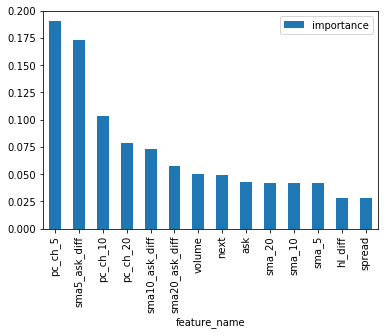

In [85]:
d = d.sort_values(by='importance',ascending=False)
d.set_index('feature_name',inplace=True)
d.plot(kind='bar')

In [86]:
model3.predict(X[5])

KeyError: 5

In [56]:
from sklearn.model_selection import cross_val_predict

In [57]:
cv_score = cross_val_predict(model3,X,y,cv=10)

In [62]:
accuracy_score(cv_score,y)

0.35328358208955224

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [67]:
pred = model3.predict(X_test)
accuracy_score(pred,y_test)

0.93948439620081414

In [87]:
req = 'https://bittrex.com/api/v1.1/public/getmarketsummaries'

import requests as r

j = r.get(req).text

pd.read_json(j);

In [2]:
from apscheduler.schedulers.blocking import BlockingScheduler

In [4]:
def some_job():
    print ("Decorated job")

In [5]:
scheduler = BlockingScheduler()

In [16]:
scheduler.add_job(some_job, 'interval', hours=0.003)
scheduler.start()

Error submitting job "some_job (trigger: interval[0:00:10.800000], next run at: 2017-05-06 07:32:09 EET)" to executor "default"
Traceback (most recent call last):
  File "/home/data-sci/anaconda3/lib/python3.5/site-packages/apscheduler/schedulers/base.py", line 958, in _process_jobs
    executor.submit_job(job, run_times)
  File "/home/data-sci/anaconda3/lib/python3.5/site-packages/apscheduler/executors/base.py", line 71, in submit_job
    self._do_submit_job(job, run_times)
  File "/home/data-sci/anaconda3/lib/python3.5/site-packages/apscheduler/executors/pool.py", line 22, in _do_submit_job
    f = self._pool.submit(run_job, job, job._jobstore_alias, run_times, self._logger.name)
  File "/home/data-sci/anaconda3/lib/python3.5/concurrent/futures/thread.py", line 107, in submit
    raise RuntimeError('cannot schedule new futures after shutdown')
RuntimeError: cannot schedule new futures after shutdown


KeyboardInterrupt: 

In [17]:
scheduler.shutdown()